In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.offline as py
import plotly.tools as tls
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import palettable
init_notebook_mode(connected=True)  
plt.style.use('ggplot')
from geopy.geocoders import Nominatim
import plotly_express as px
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gpd
import plotly.figure_factory as ff
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import word2vec
import nltk
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
import urllib.request
import random
from palettable.colorbrewer.sequential import Greens_9, Greys_9, Oranges_9, PuRd_9

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/New%20York%20City%20Current%20Job%20Postings/nyc-jobs.csv")

In [3]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         2946 non-null   int64  
 1   Agency                         2946 non-null   object 
 2   Posting Type                   2946 non-null   object 
 3   # Of Positions                 2946 non-null   int64  
 4   Business Title                 2946 non-null   object 
 5   Civil Service Title            2946 non-null   object 
 6   Title Code No                  2946 non-null   object 
 7   Level                          2946 non-null   object 
 8   Job Category                   2944 non-null   object 
 9   Full-Time/Part-Time indicator  2751 non-null   object 
 10  Salary Range From              2946 non-null   float64
 11  Salary Range To                2946 non-null   float64
 12  Salary Frequency               2946 non-null   o

In [5]:
def pie_plot(labels, values, colors, title):
    fig = {
      "data": [
        {
          "values": values,
          "labels": labels,
          "domain": {"x": [0, .48]},
          "name": "Job Type",
          "sort": False,
          "marker": {'colors': colors},
          "textinfo":"percent+label",
          "textfont": {'color': '#FFFFFF', 'size': 10},
          "hole": .6,
          "type": "pie"
        } ],
        "layout": {
            "title":title,
            "annotations": [
                {
                    "font": {
                        "size": 25,

                    },
                    "showarrow": False,
                    "text": ""

                }
            ]
        }
    }
    return fig

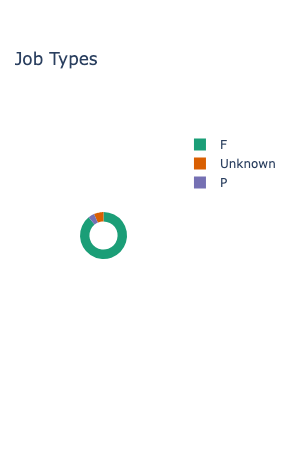

In [6]:
df['Full-Time/Part-Time indicator'].fillna("Unknown", inplace=True)
value_counts = df['Full-Time/Part-Time indicator'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#1B9E77', '#D95F02', '#7570B3'], "Job Types"))

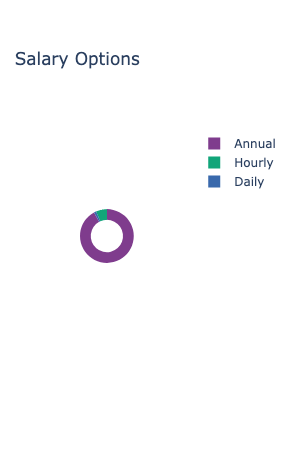

In [7]:
df['Salary Frequency'].fillna("Unknown", inplace=True)
value_counts = df['Salary Frequency'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#7F3C8D', '#11A579', '#3969AC'], "Salary Options"))

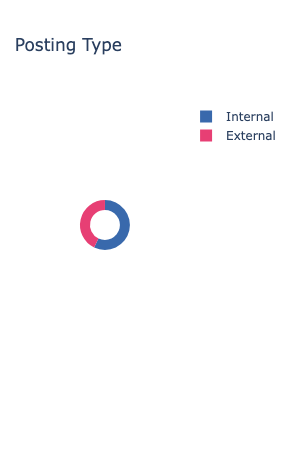

In [8]:
value_counts = df['Posting Type'].value_counts()
labels = value_counts.index.tolist()
py.iplot(pie_plot(labels, value_counts, ['#3969AC', '#E73F74'], "Posting Type"))

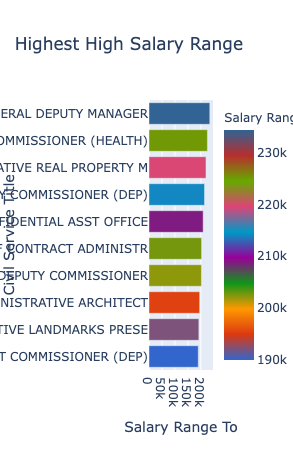

In [9]:
high_sal_range = (df.groupby('Civil Service Title')['Salary Range To'].mean().nlargest(10)).reset_index()

fig = px.bar(high_sal_range, y="Civil Service Title", x="Salary Range To", orientation='h', title = "Highest High Salary Range",color=  "Salary Range To", color_continuous_scale= px.colors.qualitative.G10).update_yaxes(categoryorder="total ascending")
fig.show()

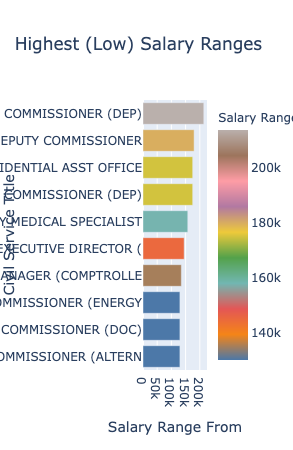

In [10]:
high_sal_range = (df.groupby('Civil Service Title')['Salary Range From'].mean().nlargest(10)).reset_index()

fig = px.bar(high_sal_range, y="Civil Service Title", x="Salary Range From", orientation='h', title = "Highest (Low) Salary Ranges",color=  "Salary Range From", color_continuous_scale= px.colors.qualitative.T10).update_yaxes(categoryorder="total ascending")

fig.show()

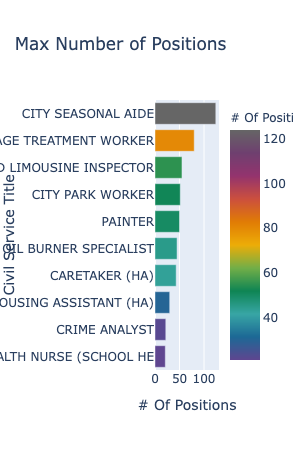

In [11]:
max_positions = (df.groupby('Civil Service Title')['# Of Positions'].mean().nlargest(10)).reset_index()

fig = px.bar(max_positions, y="Civil Service Title", x="# Of Positions", orientation='h', title = "Max Number of Positions",color=  "# Of Positions", color_continuous_scale= px.colors.qualitative.Prism).update_yaxes(categoryorder="total ascending")

fig.show()

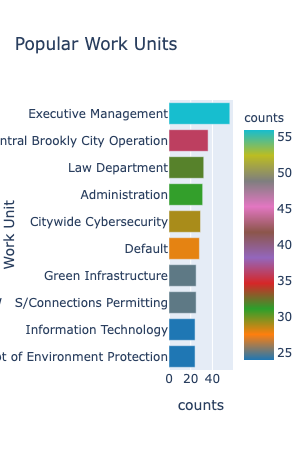

In [12]:
top_work_unitdf = df['Division/Work Unit'].value_counts().rename_axis('Work Unit').reset_index(name='counts')[:10]

fig = px.bar(top_work_unitdf, y="Work Unit", x='counts', orientation='h', title = "Popular Work Units",color=  "counts", color_continuous_scale=px.colors.qualitative.D3).update_yaxes(categoryorder="total ascending")

fig.show()

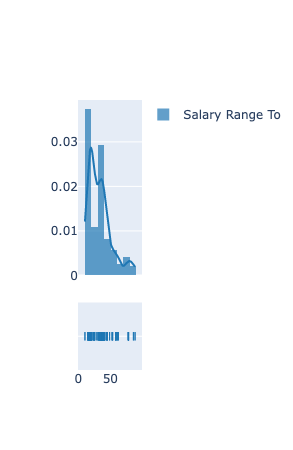

In [13]:
hourly = df[df['Salary Frequency']=='Hourly'][['Salary Range To']]
fig = ff.create_distplot([hourly['Salary Range To']], ['Salary Range To'], bin_size = 10)
fig.show()

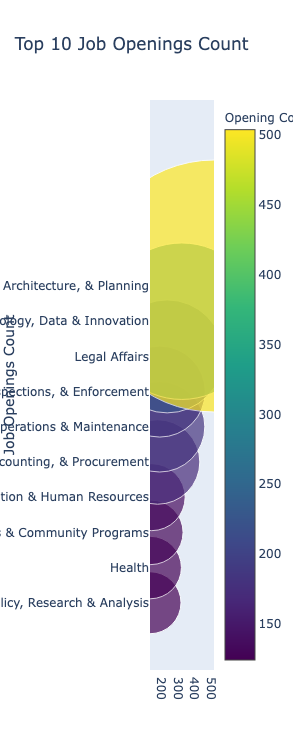

In [14]:
job_categorydf = df['Job Category'].value_counts(sort=True, ascending=False)[:10].rename_axis('Job Category').reset_index(name='Counts')
job_categorydf = job_categorydf.sort_values('Counts')
trace = go.Scatter(y = job_categorydf['Job Category'],x = job_categorydf['Counts'],mode='markers',
                   marker=dict(size= job_categorydf['Counts'].values/2,
                               color = job_categorydf['Counts'].values,
                               colorscale='Viridis',
                               showscale=True,
                               colorbar = dict(title = 'Opening Counts')),
                   text = job_categorydf['Counts'].values)

data = [(trace)]

layout= go.Layout(autosize= False, width = 1000, height = 750,
                  title= 'Top 10 Job Openings Count',
                  hovermode= 'closest',
                  xaxis=dict(showgrid=False,zeroline=False,
                             showline=False),
                  yaxis=dict(title= 'Job Openings Count',ticklen= 2,
                             gridwidth= 5,showgrid=False,
                             zeroline=True,showline=False),
                  showlegend= False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [23]:
Qual_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/XnFmbtf.png')))
skill_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/V3R3KZS.png')))
residency_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/eodMnCZ.png')))
job_mask = np.array(Image.open(urllib.request.urlopen('https://i.imgur.com/JVuN0kA.png')))
df['Min_req']=df['Minimum Qual Requirements'].apply(lambda x : x.split(',') if type(x)==str else [''])
df['Job_desc'] = df['Job Description'].apply(lambda x : x.split(',') if type(x)==str else [''])
df['res_req']=df['Residency Requirement'].apply(lambda x : x.split(',') if type(x)==str else [''])
df['Pref_skill'] = df['Preferred Skills'].apply(lambda x : x.split(',') if type(x)==str else [''])
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Greys_9.colors[random.randint(2,8)])


def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Greens_9.colors[random.randint(2,8)])

def orange_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Oranges_9.colors[random.randint(2,8)])

def PuRd_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(PuRd_9.colors[random.randint(2,8)])

def produce_wordcloud(dataframe, title, mask, color):
    
  
    plt.figure(figsize=(10, 10))
    corpus=dataframe.values.tolist()
    corpus=','.join(x  for list_words in corpus for x in list_words)
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False, height=1500,
                 mask = mask).generate(corpus)
    wordcloud.recolor(color_func=color)
    plt.axis("off")
    plt.title(title)    
    return plt.imshow(wordcloud)


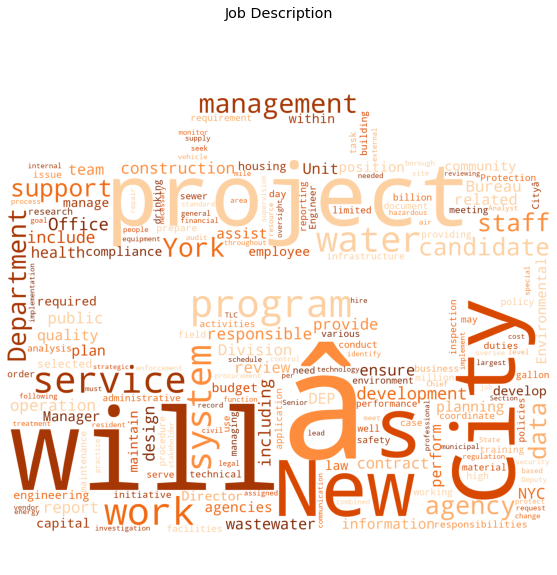

In [24]:
produce_wordcloud(df['Job_desc'], "Job Description", job_mask, orange_color_func)

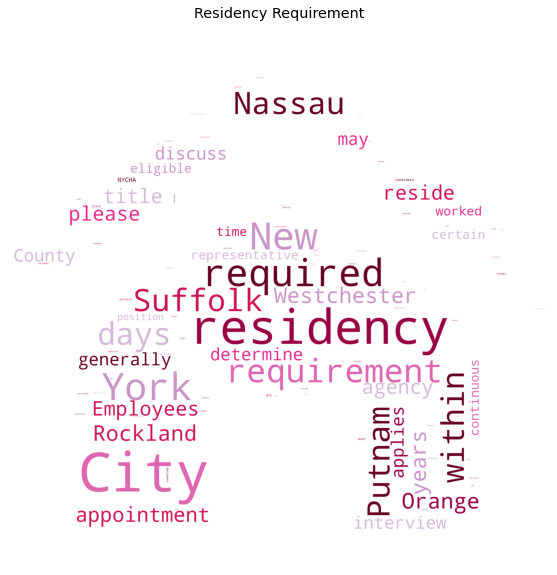

In [25]:
produce_wordcloud(df['res_req'], "Residency Requirement", residency_mask, PuRd_color_func)

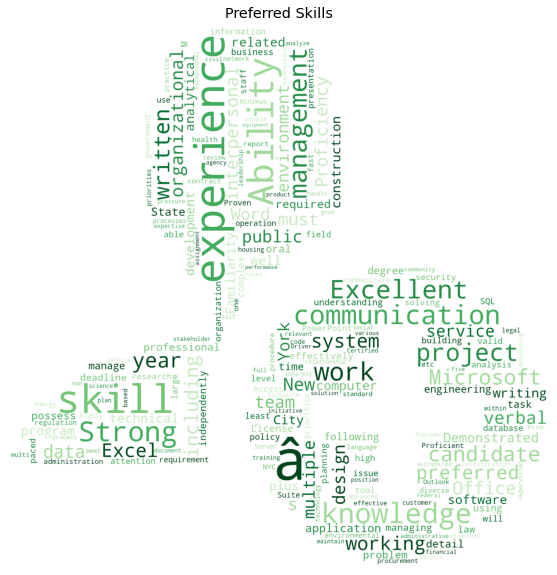

In [26]:
produce_wordcloud(df['Pref_skill'], "Preferred Skills", skill_mask, green_color_func)